# Neural Nets

In [2]:
import tensorflow as tf

C:\Users\scott\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
hai = tf.constant( "Hai" )

In [5]:
hai.dtype

tf.string

In [6]:
x = tf.constant( 100 )

In [7]:
x.dtype

tf.int32

In [8]:
type(x)

tensorflow.python.framework.ops.Tensor

In [9]:
sess = tf.Session()

In [10]:
sess.run( hai )

b'Hai'

In [11]:
sess.run(x)

100

In [12]:
type( sess.run(x) )

numpy.int32

In [13]:
x = tf.constant(2)

In [14]:
y = tf.constant(3)

In [16]:
with tf.Session() as sess:
    print( 'Ops' )
    print( 'Addition: ', sess.run( x + y ) )
    print( 'Multiplication: ', sess.run( x * y ) )
        


Ops
Addition:  5
Multiplication:  6


In [17]:
x = tf.placeholder( tf.int32 )

In [18]:
y = tf.placeholder( tf.int32 )

In [19]:
x

<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=int32>

In [20]:
y

<tf.Tensor 'Placeholder_1:0' shape=<unknown> dtype=int32>

In [21]:
add = tf.add( x, y )

In [23]:
sub = tf.subtract( x, y )

In [25]:
mul = tf.multiply( x, y )

In [28]:
with tf.Session() as sess:
    print( 'Ops' )
    print( 'addition', sess.run( add, feed_dict = { x : 20, y : 30 } ) )
    print( 'subtraction', sess.run( sub, feed_dict = { x : 20, y : 30 } ) )
    print( 'multiplication', sess.run( mul, feed_dict = { x : 20, y : 30 } ) )

Ops
addition 50
subtraction -10
multiplication 600


In [29]:
import numpy as np

In [31]:
a = np.array( [ [5.0, 5.0] ] )

In [32]:
b = np.array( [ [ 2.0 ], [ 2.0 ] ] )

In [33]:
mat1 = tf.constant(a)

In [34]:
mat2 = tf.constant(b)

In [35]:
matrix_multi = tf.matmul( mat1, mat2 )

In [37]:
with tf.Session() as sess:
    result = sess.run( matrix_multi )
    print( result )

[[20.]]


In [38]:
# C:\Users\scott\Desktop\gitHub\python\notebooks\Data

In [47]:
from tensorflow.examples.tutorials.mnist import input_data

In [49]:
mnist = input_data.read_data_sets( r"C:\Users\scott\Desktop\gitHub\python\notebooks\Data", one_hot = True )

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting C:\Users\scott\Desktop\gitHub\python\notebooks\Data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting C:\Users\scott\Desktop\gitHub\python\notebooks\Data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting C:\Users\scott\Desktop\gitHub\python\notebooks\Data\t10k-images-idx3-ubyte.gz
Extracting C:\Users\scott\Desktop\gitHub\python\notebooks\Data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [50]:
type( mnist )

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [52]:
mnist.train.images.shape

(55000, 784)

In [53]:
mnist.train.num_examples

55000

In [54]:
mnist.test.num_examples

10000

In [55]:
import matplotlib.pyplot as plt

In [56]:
%matplotlib inline

In [57]:
mnist.train.images[1].shape

(784,)

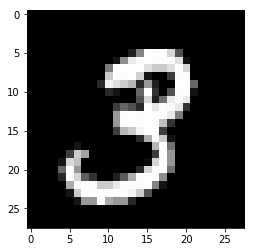

In [72]:
plt.imshow( mnist.train.images[1].reshape( 28, 28 ), cmap = 'gist_gray' )

In [66]:
x = tf.placeholder( tf.float32, shape = [ None, 784 ] )

In [67]:
W = tf.Variable( tf.zeros( [ 784, 10 ] ) )

In [68]:
b = tf.Variable( tf.zeros( [ 10 ] ) )

In [69]:
y = tf.matmul( x, W ) + b

In [70]:
y_true = tf.placeholder( tf.float32, shape = [ None, 10 ] )

In [73]:
cross_entropy = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2( labels = y_true, logits = y ) )

In [74]:
optimizer = tf.train.GradientDescentOptimizer( learning_rate = 0.5 )

In [75]:
train = optimizer.minimize( cross_entropy )

In [76]:
init = tf.global_variables_initializer()

In [78]:
with tf.Session() as sess:
    sess.run( init )
    
    for step in range( 1000 ):
        batch_x, batch_y = mnist.train.next_batch( 100 )
        sess.run( train, feed_dict = { x : batch_x, y_true : batch_y } )
        
    matches = tf.equal( tf.argmax( y, 1 ), tf.argmax( y_true, 1 ) )
    acc = tf.reduce_mean( tf.cast( matches, tf.float32 ) )
    
    print( sess.run( acc, feed_dict = { x : mnist.test.images, y_true : mnist.test.labels } ) )

0.916


## Estimators

In [80]:
import pandas as pd

In [84]:
df = pd.read_csv( r"C:\Users\scott\Desktop\gitHub\python\notebooks\Data\iris.csv" )

In [85]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [86]:
df.columns = [ 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target' ]

In [87]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [88]:
df[ 'target' ] = df[ 'target' ].apply( int )

In [89]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [90]:
y = df[ 'target' ]

In [91]:
X = df.drop( 'target', axis = 1 )

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3 )

In [94]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [95]:
feat_cols = []

for col in X.columns:
    feat_cols.append( tf.feature_column.numeric_column( col ) )

In [96]:
feat_cols

[_NumericColumn(key='sepal_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='sepal_width', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='petal_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='petal_width', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [97]:
input_func = tf.estimator.inputs.pandas_input_fn( x = X_train, y = y_train, batch_size = 10, num_epochs = 5, shuffle = True )

In [98]:
classifier = tf.estimator.DNNClassifier( hidden_units = [ 10, 20, 10 ], n_classes = 3, feature_columns = feat_cols )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\scott\\AppData\\Local\\Temp\\tmpljw8lc82', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000021E002E71D0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [100]:
classifier.train( input_fn = input_func, steps = 50 )

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\scott\AppData\Local\Temp\tmpljw8lc82\model.ckpt.
INFO:tensorflow:loss = 11.876828, step = 1
INFO:tensorflow:Saving checkpoints for 50 into C:\Users\scott\AppData\Local\Temp\tmpljw8lc82\model.ckpt.
INFO:tensorflow:Loss for final step: 4.2579803.


In [103]:
pred_fn = tf.estimator.inputs.pandas_input_fn( x = X_test, batch_size = len( X_test ), shuffle = False )

In [106]:
predictions = list( classifier.predict( input_fn = pred_fn ) )

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\scott\AppData\Local\Temp\tmpljw8lc82\model.ckpt-50
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [108]:
final_preds = []

for pred in predictions:
    final_preds.append( pred[ 'class_ids' ][0] )

In [110]:
# final_preds

In [111]:
from sklearn.metrics import classification_report, confusion_matrix

In [112]:
print( classification_report( y_test, final_preds ) )

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.00      0.00      0.00        13
          2       0.57      1.00      0.72        17

avg / total       0.55      0.71      0.61        45



C:\Users\scott\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [113]:
print( confusion_matrix( y_test, final_preds ) )

[[15  0  0]
 [ 0  0 13]
 [ 0  0 17]]
